In [1]:
import xarray as xr # for data handling
import numpy as np # for maths
import matplotlib as mpl # plotlibrary
import matplotlib.pyplot as plt # for the plots 
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm # for making a log 10 colorscale
import cartopy # library for making maps
from cartopy import crs as ccrs # Projection Library
from cartopy.crs import Stereographic, PlateCarree, Mollweide # Map projections I use00
from cartopy.feature import LAND, COASTLINE # Vectordata of the Coastline and land for making the maps prettier
import cmocean
from glob import glob
import dask
from scipy.io import loadmat
import gsw

# Exercise 1

In [7]:
hydrographic_mean = xr.open_dataset("./Hydrographic_mean_global.nc")
temp_na = hydrographic_mean.TEMP < 100
sal_na = hydrographic_mean.SAL < 100
oxy_na = hydrographic_mean.OXY < 100
hydrographic_mean.update(
    dict(
        TEMP=hydrographic_mean.TEMP.where(temp_na),
        SAL=hydrographic_mean.SAL.where(sal_na),
        OXY=hydrographic_mean.OXY.where(oxy_na),
    ),
)
hydrographic_mean

<xarray.Dataset> Size: 63MB
Dimensions:    (depth: 45, latitude: 161, longitude: 360)
Coordinates:
  * depth      (depth) float32 180B 0.0 10.0 20.0 ... 5.5e+03 5.75e+03 6e+03
  * latitude   (latitude) float32 644B -80.0 -79.0 -78.0 ... 78.0 79.0 80.0
  * longitude  (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    TEMP       (depth, latitude, longitude) float64 21MB nan nan nan ... nan nan
    SAL        (depth, latitude, longitude) float64 21MB nan nan nan ... nan nan
    OXY        (depth, latitude, longitude) float64 21MB nan nan nan ... nan nan

In [8]:
bottom_cell_temp = temp_na.sum(dim="depth")-1
bottom_cell_sal = sal_na.sum(dim="depth")-1
bottom_cell_oxy = oxy_na.sum(dim="depth")-1

In [83]:
bottom_cell_temp = bottom_cell_temp.where(bottom_cell_temp > 0, 0)
bottom_cell_sal = bottom_cell_sal.where(bottom_cell_sal > 0, 0)
bottom_cell_oxy = bottom_cell_oxy.where(bottom_cell_oxy > 0, 0)

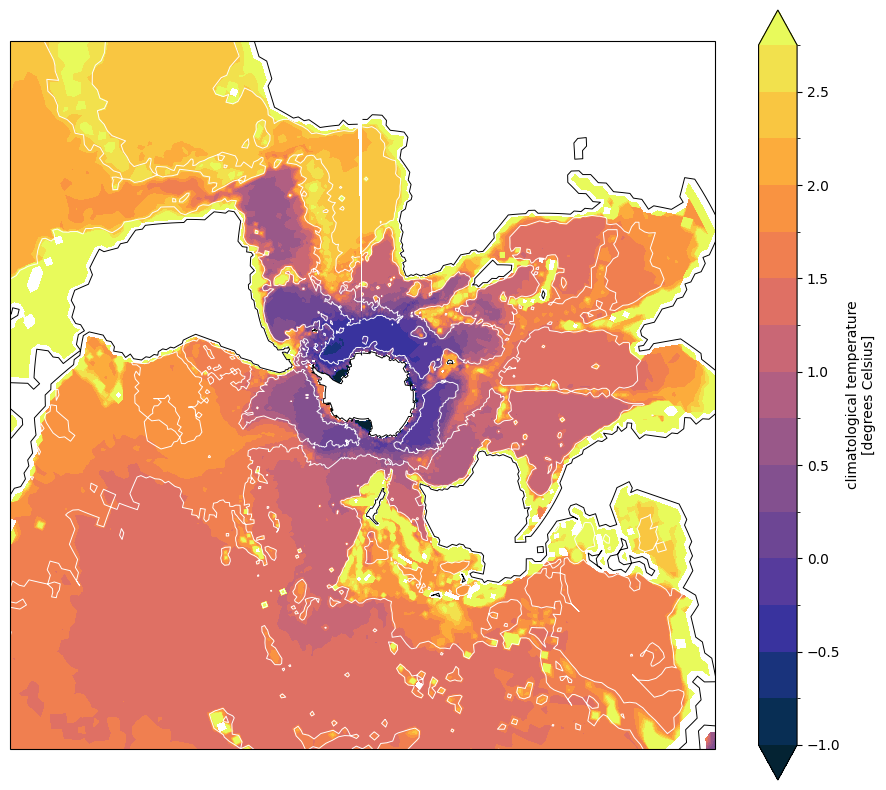

In [84]:
fig = plt.figure(figsize=(25,10),)
ax = fig.add_subplot(121, projection=ccrs.SouthPolarStereo())
hydrographic_mean.TEMP.isel(depth=bottom_cell_temp).plot.contourf(
    # vmax=5,
    levels=np.arange(-1, 3, .25),
    cmap=cmocean.cm.thermal,
    ax=ax, transform=ccrs.PlateCarree(),
)
depth.plot.contour(
    cmap="Greys_r",
    levels=[0, 4000],
    ax=ax, transform=ccrs.PlateCarree(),
).set_linewidths(.7)
ax.set_extent([-180,180,-80,20], crs=ccrs.PlateCarree())
plt.show()

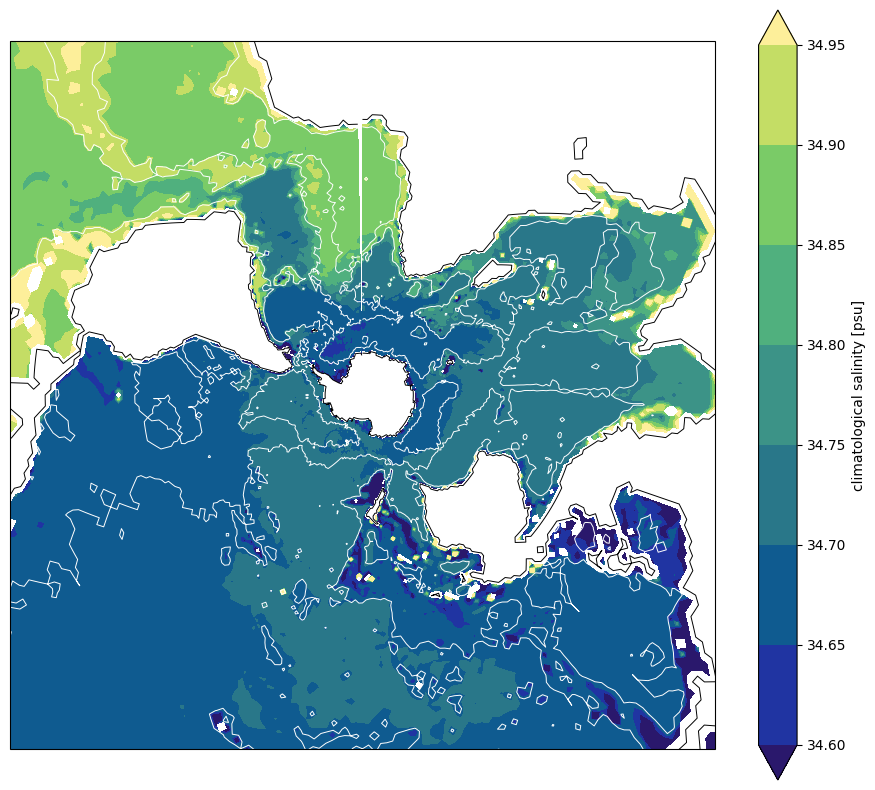

In [87]:
fig = plt.figure(figsize=(25,10),)
ax = fig.add_subplot(121, projection=ccrs.SouthPolarStereo())
hydrographic_mean.SAL.isel(depth=bottom_cell_sal).plot.contourf(
    # vmin=33, vmax=35,
    levels=np.arange(34.6, 35, .05),
    cmap=cmocean.cm.haline,
    ax=ax, transform=ccrs.PlateCarree(),
)
depth.plot.contour(
    cmap="Greys_r",
    levels=[0, 4000],
        ax=ax, transform=ccrs.PlateCarree(),
).set_linewidths(.7)
ax.set_extent([-180,180,-80,20], crs=ccrs.PlateCarree())
plt.show()

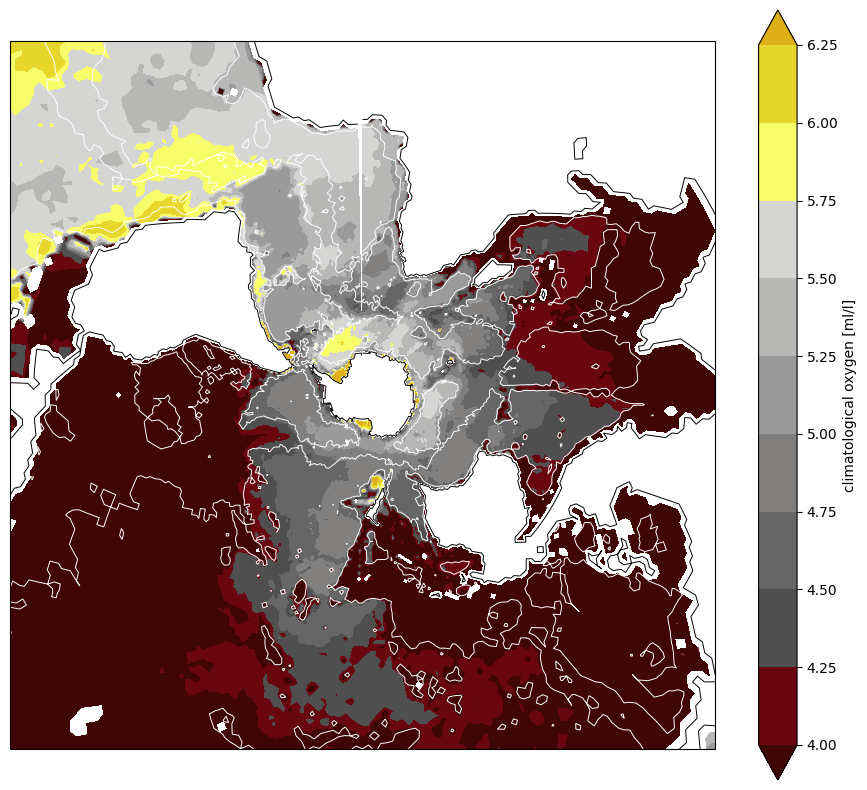

In [88]:
fig = plt.figure(figsize=(25,10),)
ax = fig.add_subplot(121, projection=ccrs.SouthPolarStereo())
hydrographic_mean.OXY.isel(depth=bottom_cell_oxy).plot.contourf(
    levels=np.arange(4,6.3,.25),
    cmap=cmocean.cm.oxy,
    ax=ax, transform=ccrs.PlateCarree(),
)
depth.plot.contour(
    cmap="Greys_r",
    levels=[0, 4000],
    ax=ax, transform=ccrs.PlateCarree(),
).set_linewidths(.7)
ax.set_extent([-180,180,-80,20], crs=ccrs.PlateCarree())
plt.show()